                           SPEEDTEST PRESENTATION

                             by:Gavin Boler

Ookla is the global leader in network intelligence and connectivity insights. The company owns the world-renowned Speed Test platform which is the definitive way to test the speed and performance of your internet connection. 
 
The datasets provide global fixed broadband performance metrics in zoom level 16 web mercator tiles (approximately 610.8 meters by 610.8 meters at the equator). Download speed, upload speed, and latency are collected via the Speedtest by Ookla applications for Android and iOS and averaged for each tile. Measurements are filtered to results containing GPS-quality location accuracy.

https://www.kaggle.com/datasets/dimitrisangelide/speedtest-data-by-ookla






1. Add a "Quarter" column to each individual dataframe and combine the sets with common years. Then, add a "Year" column and combine the resulting datasets together to make one complete dataframe. Finally, remove commas from the numbers and change the types to numeric.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

#2020 Q1
df_2020_q1 = pd.read_csv("fixed_year_2020_quarter_01.csv")
df_2020_q1.insert(loc=1, column="Quarter", value="1")
#2020 Q2
df_2020_q2 = pd.read_csv("fixed_year_2020_quarter_02.csv")
df_2020_q2.insert(loc=1, column="Quarter", value="2")
#2020 Q3
df_2020_q3 = pd.read_csv("fixed_year_2020_quarter_03.csv")
df_2020_q3.insert(loc=1, column="Quarter", value="3")
#2020 Q4
df_2020_q4 = pd.read_csv("fixed_year_2020_quarter_04.csv")
df_2020_q4.insert(loc=1, column="Quarter", value="4")
#Combined 2020
df_2020 = pd.concat([df_2020_q1, df_2020_q2, df_2020_q3, df_2020_q4], ignore_index=True)
df_2020.insert(loc=1, column="Year", value="2020")

#2021 Q1
df_2021_q1 = pd.read_csv("fixed_year_2021_quarter_01.csv")
df_2021_q1.insert(loc=1, column="Quarter", value="1")
#2021 Q2
df_2021_q2 = pd.read_csv("fixed_year_2021_quarter_02.csv")
df_2021_q2.insert(loc=1, column="Quarter", value="2")
#2021 Q3
df_2021_q3 = pd.read_csv("fixed_year_2021_quarter_03.csv")
df_2021_q3.insert(loc=1, column="Quarter", value="3")
#2021 Q4
df_2021_q4 = pd.read_csv("fixed_year_2021_quarter_04.csv")
df_2021_q4.insert(loc=1, column="Quarter", value="4")
#Combined 2021
df_2021 = pd.concat([df_2021_q1, df_2021_q2, df_2021_q3, df_2021_q4], ignore_index=True)
df_2021.insert(loc=1, column="Year", value="2021")

#2022 Q1
df_2022_q1 = pd.read_csv("fixed_year_2022_quarter_01.csv")
df_2022_q1.insert(loc=1, column="Quarter", value="1")
#2022 Q2
df_2022_q2 = pd.read_csv("fixed_year_2022_quarter_02.csv")
df_2022_q2.insert(loc=1, column="Quarter", value="2")
#2022 Q3
df_2022_q3 = pd.read_csv("fixed_year_2022_quarter_03.csv")
df_2022_q3.insert(loc=1, column="Quarter", value="3")
#Combined 2022
df_2022 = pd.concat([df_2022_q1, df_2022_q2, df_2022_q3], ignore_index=True)
df_2022.insert(loc=1, column="Year", value="2022")


In [2]:
df = pd.concat([df_2020, df_2021, df_2022], ignore_index=True)
df["Number of Records"] = df["Number of Records"].str.replace(",", "")
df["Number of Records"] = df["Number of Records"].apply(pd.to_numeric)

df["Devices"] = df["Devices"].str.replace(",", "")
df["Devices"] = df["Devices"].apply(pd.to_numeric)

df["Tests"] = df["Tests"].str.replace(",", "")
df["Tests"] = df["Tests"].apply(pd.to_numeric)

df["Avg. Avg D Kbps"] = df["Avg. Avg D Kbps"].str.replace(",", "")
df["Avg. Avg D Kbps"] = df["Avg. Avg D Kbps"].apply(pd.to_numeric)

df["Avg. Avg U Kbps"] = df["Avg. Avg U Kbps"].str.replace(",", "")
df["Avg. Avg U Kbps"] = df["Avg. Avg U Kbps"].apply(pd.to_numeric)

df["Avg. Pop2005"] = df["Avg. Pop2005"].str.replace(",", "")
df["Avg. Pop2005"] = df["Avg. Pop2005"].apply(pd.to_numeric)


2. What is Algeria's average upload speed compared to Albania's for each quarter in 2020?

C:\Users\gavbo\AppData\Local\Temp\ipykernel_10196\1778264558.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = uk_fr["Quarter"] , y = uk_fr["Avg. Avg U Kbps"], hue=uk_fr["Name"] ,ci=None)


<AxesSubplot: xlabel='Quarter', ylabel='Avg. Avg U Kbps'>

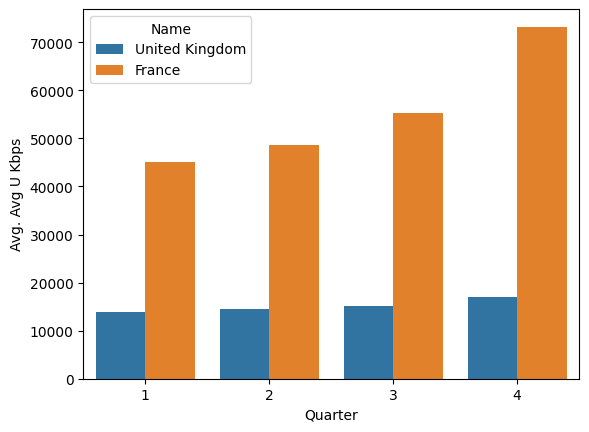

In [3]:
uk = df[df["Name"].eq("United Kingdom")]
france = df[df["Name"].eq("France")]
uk_france = pd.concat([uk, france], ignore_index=True)
uk_fr = uk_france[uk_france["Year"].eq("2020")]

sns.barplot(x = uk_fr["Quarter"] , y = uk_fr["Avg. Avg U Kbps"], hue=uk_fr["Name"] ,ci=None)

3. How has the United States' average latency changed over the years?

C:\Users\gavbo\AppData\Local\Temp\ipykernel_10196\3966452384.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = us["Year"] , y = us["Avg Lat Ms"], hue= us["Quarter"] ,ci=None)


<AxesSubplot: xlabel='Year', ylabel='Avg Lat Ms'>

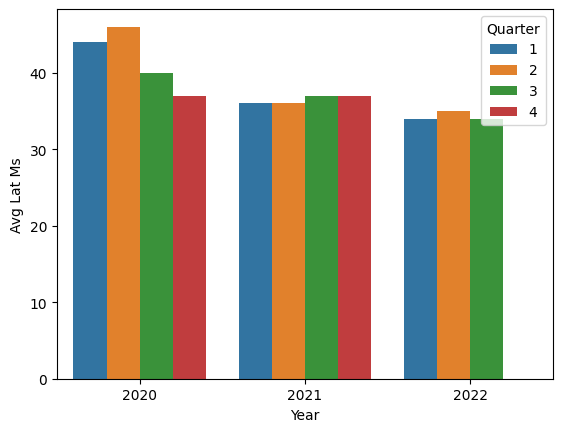

In [5]:
us = df[df["Name"].eq("United States")]
sns.barplot(x = us["Year"] , y = us["Avg Lat Ms"], hue= us["Quarter"] ,ci=None)

4. Plot the averge download speed for each Far Eastern country represented in the data in 2021.

C:\Users\gavbo\AppData\Local\Temp\ipykernel_10196\2498077004.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = far_east["Name"] , y = far_east["Avg. Avg D Kbps"], hue= far_east["Quarter"] ,ci=None)


<AxesSubplot: xlabel='Name', ylabel='Avg. Avg D Kbps'>

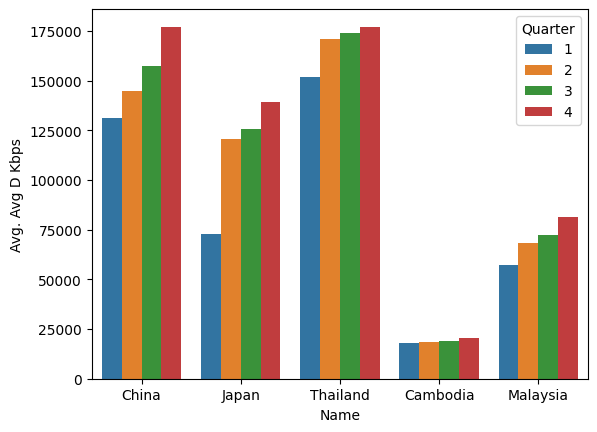

In [6]:
year_21 = df[df["Year"].eq("2021")]

china = year_21[year_21["Name"].eq("China")]
japan = year_21[year_21["Name"].eq("Japan")]
thailand = year_21[year_21["Name"].eq("Thailand")]
cambodia = year_21[year_21["Name"].eq("Cambodia")]
malaysia = year_21[year_21["Name"].eq("Malaysia")]

far_east = pd.concat([china, japan, thailand, cambodia, malaysia])
sns.barplot(x = far_east["Name"] , y = far_east["Avg. Avg D Kbps"], hue= far_east["Quarter"] ,ci=None)